# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [91]:
# Dependencies and Setup
import requests
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
from scipy.stats import linregress
from citipy import citipy

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key


In [92]:
#Convert any temperature units from kelvin to C
def kelvin_to_celsius(kelvin_temp):
    celsius_temp = kelvin_temp - 273.15
    return celsius_temp


### Generate the Cities List by Using the `citipy` Library

In [93]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 580


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [94]:
# Set the API base URL
base_url = "https://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{base_url}?q={city}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = kelvin_to_celsius(city_weather['main']['temp'])  # Convert to Celsius
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except Exception as e:
        print(f"City not found or error: {str(e)}. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hawaiian paradise park
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | blackmans bay
Processing Record 4 of Set 1 | margaret river
Processing Record 5 of Set 1 | el granada
Processing Record 6 of Set 1 | saldanha
Processing Record 7 of Set 1 | udachny
Processing Record 8 of Set 1 | qamdo
Processing Record 9 of Set 1 | anchorage
Processing Record 10 of Set 1 | ust-nera
Processing Record 11 of Set 1 | adamstown
Processing Record 12 of Set 1 | port-aux-francais
Processing Record 13 of Set 1 | olonkinbyen
Processing Record 14 of Set 1 | waitangi
Processing Record 15 of Set 1 | pisco
Processing Record 16 of Set 1 | tibro
Processing Record 17 of Set 1 | vilyuchinsk
Processing Record 18 of Set 1 | georgetown
Processing Record 19 of Set 1 | yuzhno-kurilsk
Processing Record 20 of Set 1 | keflavik
Processing Record 21 of Set 1 | port elizabeth
Processing Record 22 of Set 1 | acapetahua

Processing Record 37 of Set 4 | fort bragg
Processing Record 38 of Set 4 | whitehorse
Processing Record 39 of Set 4 | los andes
Processing Record 40 of Set 4 | nguigmi
Processing Record 41 of Set 4 | victoriaville
Processing Record 42 of Set 4 | caleta de carquin
Processing Record 43 of Set 4 | hithadhoo
Processing Record 44 of Set 4 | sitka
Processing Record 45 of Set 4 | avarua
Processing Record 46 of Set 4 | berezovyy
Processing Record 47 of Set 4 | crane
Processing Record 48 of Set 4 | lebu
Processing Record 49 of Set 4 | asosa
Processing Record 0 of Set 5 | ingenio la esperanza
Processing Record 1 of Set 5 | bayanhongor
Processing Record 2 of Set 5 | rongelap
Processing Record 3 of Set 5 | yankton
Processing Record 4 of Set 5 | cova figueira
Processing Record 5 of Set 5 | arkhangel'sk
Processing Record 6 of Set 5 | salekhard
Processing Record 7 of Set 5 | kavieng
Processing Record 8 of Set 5 | ceeldheer
Processing Record 9 of Set 5 | scottsbluff
Processing Record 10 of Set 5 | hor

Processing Record 23 of Set 8 | ukholovo
Processing Record 24 of Set 8 | worland
Processing Record 25 of Set 8 | arraial do cabo
Processing Record 26 of Set 8 | pyhajarvi
Processing Record 27 of Set 8 | saynshand
Processing Record 28 of Set 8 | shimoda
Processing Record 29 of Set 8 | kirakira
Processing Record 30 of Set 8 | hinton
Processing Record 31 of Set 8 | urangan
Processing Record 32 of Set 8 | puerto deseado
Processing Record 33 of Set 8 | dashitou
Processing Record 34 of Set 8 | tanque verde
Processing Record 35 of Set 8 | eyl
Processing Record 36 of Set 8 | mahabe
City not found or error: 'coord'. Skipping...
Processing Record 37 of Set 8 | ingeniero guillermo n. juarez
Processing Record 38 of Set 8 | dazuocun
Processing Record 39 of Set 8 | lazaro cardenas
Processing Record 40 of Set 8 | hargeysa
Processing Record 41 of Set 8 | ngereklmadel
Processing Record 42 of Set 8 | gordonvale
Processing Record 43 of Set 8 | houghton
Processing Record 44 of Set 8 | borca
Processing Rec

Processing Record 7 of Set 12 | pierre
Processing Record 8 of Set 12 | korsakov
Processing Record 9 of Set 12 | banda aceh
Processing Record 10 of Set 12 | las heras
Processing Record 11 of Set 12 | vwawa
Processing Record 12 of Set 12 | sirte
Processing Record 13 of Set 12 | san jose del cabo
Processing Record 14 of Set 12 | al bahah
Processing Record 15 of Set 12 | coquimbo
Processing Record 16 of Set 12 | tanrake village
City not found or error: 'coord'. Skipping...
Processing Record 17 of Set 12 | kaohsiung
Processing Record 18 of Set 12 | puerto madero
Processing Record 19 of Set 12 | suileng
Processing Record 20 of Set 12 | flying fish cove
Processing Record 21 of Set 12 | wellington
Processing Record 22 of Set 12 | ngaruawahia
Processing Record 23 of Set 12 | mount pearl
Processing Record 24 of Set 12 | zelino
Processing Record 25 of Set 12 | ndele
Processing Record 26 of Set 12 | magong
Processing Record 27 of Set 12 | yarkovo
Processing Record 28 of Set 12 | kupang
Processing 

In [95]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()


City          552
Lat           552
Lng           552
Max Temp      552
Humidity      552
Cloudiness    552
Wind Speed    552
Country       552
Date          552
dtype: int64

In [96]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hawaiian paradise park,19.5933,-154.9731,20.31,90,0,2.06,US,1697993594
1,albany,42.6001,-73.9662,8.86,76,100,0.45,US,1697993453
2,blackmans bay,-43.0167,147.3167,11.92,88,86,1.79,AU,1697993594
3,margaret river,-33.9500,115.0667,13.37,59,93,7.27,AU,1697993595
4,el granada,37.5027,-122.4694,17.53,89,100,4.12,US,1697993314


In [97]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [98]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hawaiian paradise park,19.5933,-154.9731,20.31,90,0,2.06,US,1697993594
1,albany,42.6001,-73.9662,8.86,76,100,0.45,US,1697993453
2,blackmans bay,-43.0167,147.3167,11.92,88,86,1.79,AU,1697993594
3,margaret river,-33.9500,115.0667,13.37,59,93,7.27,AU,1697993595
4,el granada,37.5027,-122.4694,17.53,89,100,4.12,US,1697993314


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

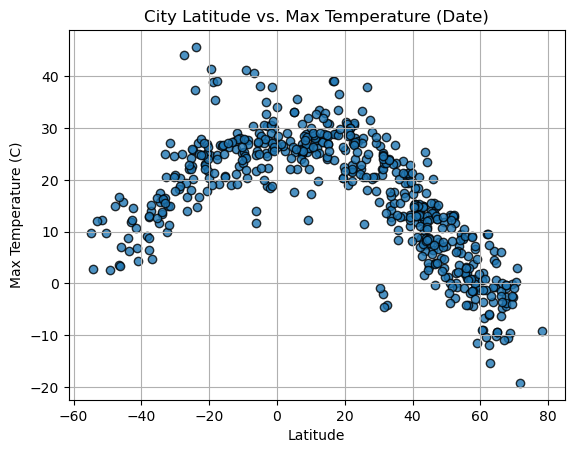

In [99]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black", marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (Date)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

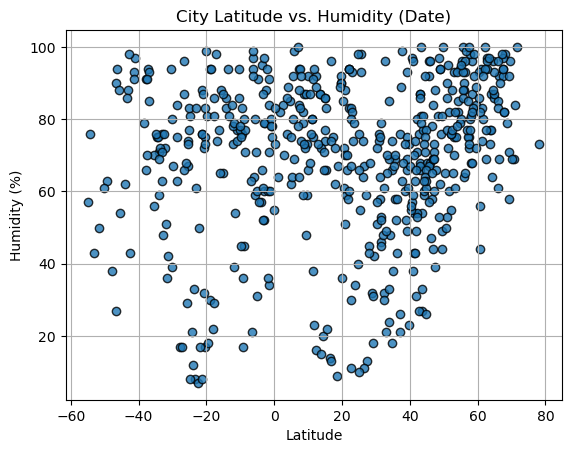

In [100]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (Date)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

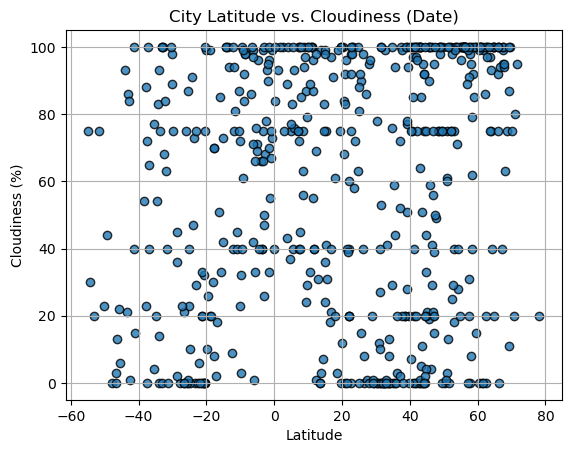

In [101]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (Date)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

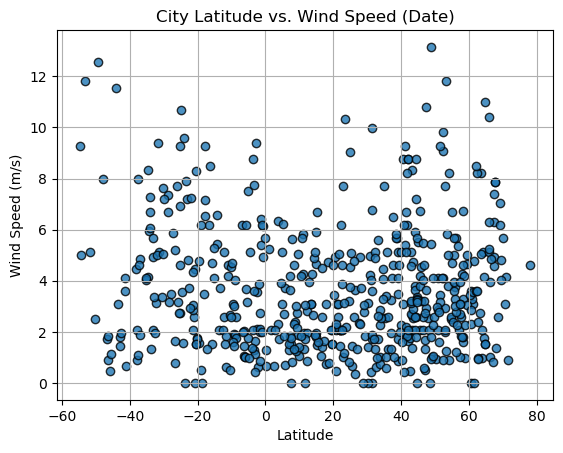

In [102]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black", marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (Date)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [103]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-squared is: {rvalue**2}")
    plt.show()

In [104]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hawaiian paradise park,19.5933,-154.9731,20.31,90,0,2.06,US,1697993594
1,albany,42.6001,-73.9662,8.86,76,100,0.45,US,1697993453
4,el granada,37.5027,-122.4694,17.53,89,100,4.12,US,1697993314
6,udachny,66.4167,112.4000,-4.75,92,100,3.95,RU,1697993595
7,qamdo,31.1667,97.2333,-2.11,58,27,0.44,CN,1697993596


In [105]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,blackmans bay,-43.0167,147.3167,11.92,88,86,1.79,AU,1697993594
3,margaret river,-33.9500,115.0667,13.37,59,93,7.27,AU,1697993595
5,saldanha,-33.0117,17.9442,25.03,76,100,4.91,ZA,1697993035
10,adamstown,-25.0660,-130.1015,22.64,77,23,4.61,PN,1697993596
11,port-aux-francais,-49.3500,70.2167,2.61,63,44,12.56,TF,1697993597


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.759184498912942


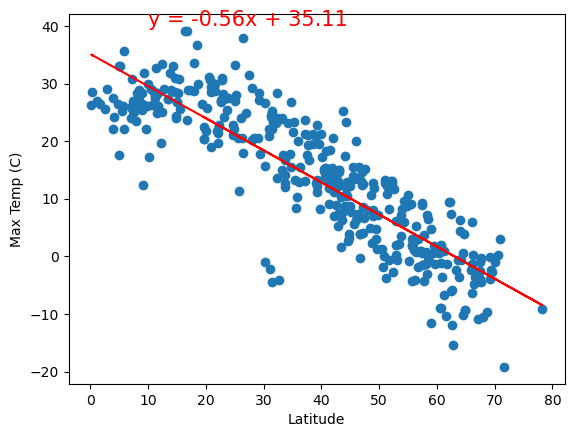

In [106]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp (C)', (10, 40))

The r-squared is: 0.47207413791140757


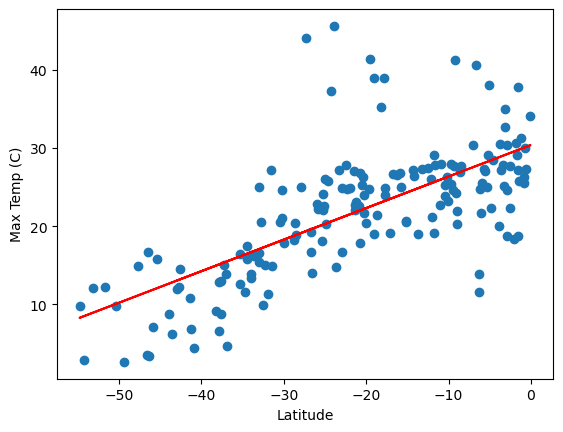

In [107]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp (C)', (-50, 90))

**Discussion about the linear relationship:** From the regression, we can see that the further away from the equator we go (shown in negative regression in the Northern plot chart), the lower the max temperature goes. Conversely, when looking at the Southern Hemisphere, we can see that the closer to the equator we go, the higher the max temperature is, generally speaking. That said, the correlation between temperature and latitude is much stronger in the Northern hemisphere. The Southern hemisphere has more outliers and the latitude is not the most likely to correlate with the max temperature.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.04367777072389761


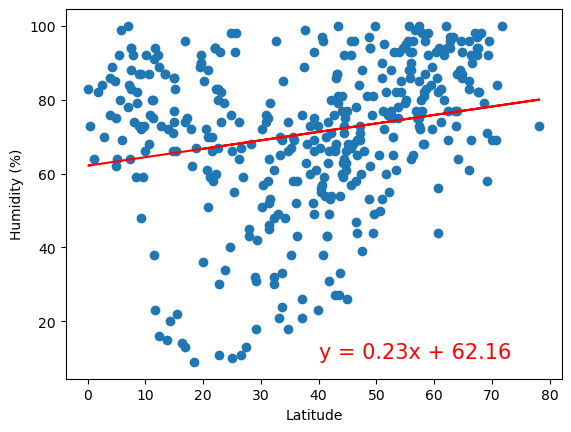

In [108]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity (%)', (40, 10))

The r-squared is: 0.0011785399749057852


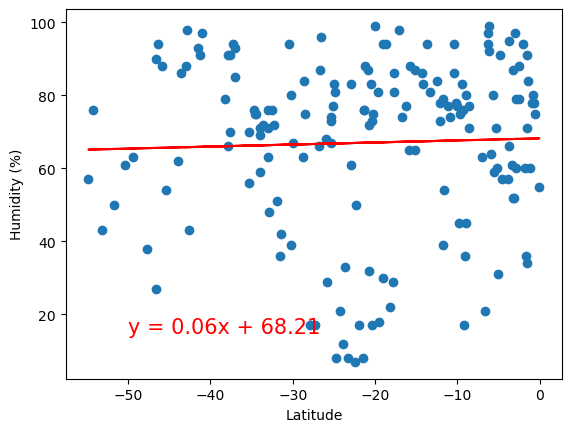

In [109]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity (%)', (-50, 15))

**Discussion about the linear relationship:** We can see through the r-squared value on both charts that there is not a high level of correlation between humidity and latitude. That said, the Northern Hemisphere is more likely than the Southern Hemisphere to have more humidity with the further away from the equator it gets. It is not a strong correlation though, and other factors should be looked at over latitude.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.007971112738431804


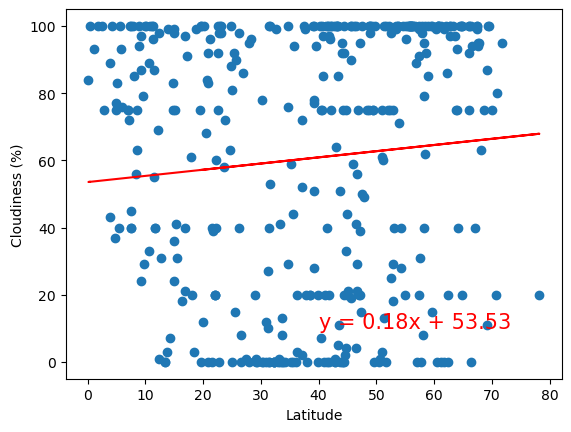

In [110]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness (%)', (40, 10))

The r-squared is: 0.08048065078303117


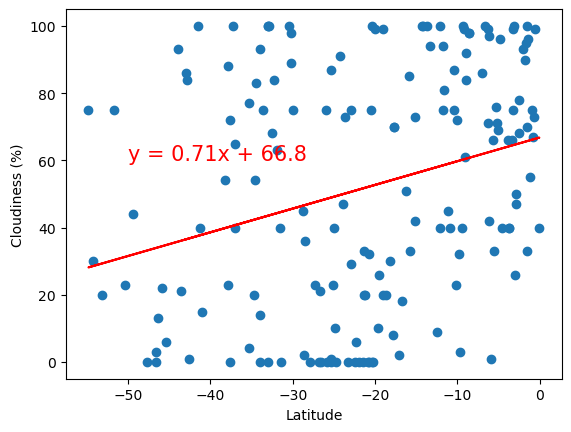

In [111]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness (%)', (-50, 60))

**Discussion about the linear relationship:** There is a slight correlation in both scatter plots for cloudiness vs latitude to show that the the Southern Hemisphere is more likely to be cloudy the closer to the equator it gets. However, in the Northern Hemisphere, it is slightly more likely to be cloudy the further from the equator it gets. In either case, this likely indicates that there is another reason for cloudiness that should be explored.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.04113675380822945


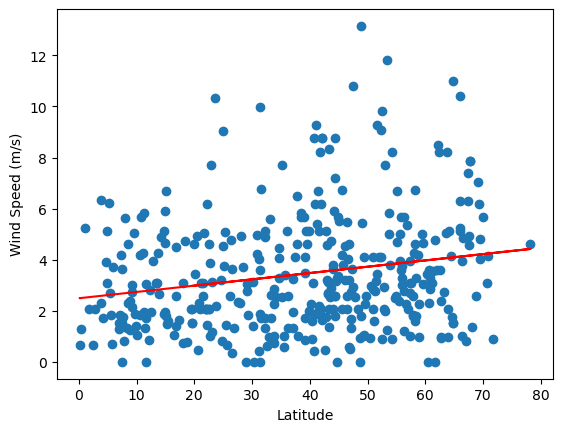

In [112]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed (m/s)', (40, 25))

The r-squared is: 0.03914862824811443


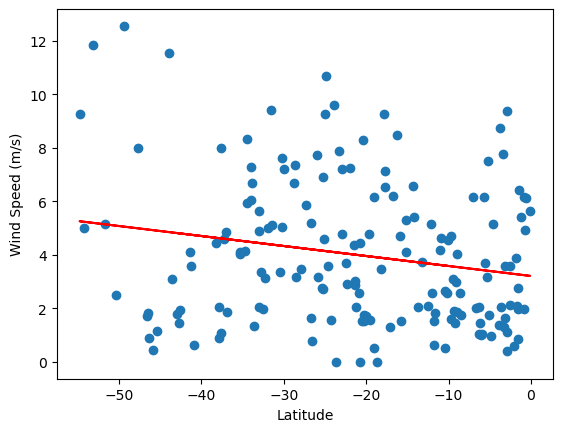

In [113]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed (m/s)', (-50, 25))

**Discussion about the linear relationship:** In both the data sets for Southern and Northern hemispheres, we do not see a very strong correlation between the latitude and wind speed, indicating there is likely other factors at play beyond the two data sets compared here.